# Partie 2 : Analyse exploratoire préliminaire des données

Ce ficher a pour objectif de mener une analyse préliminaire des données pour essayer de mettre en évidence les variables qui vont être les plus utiles dans la comparaison des PER des entreprises cotées sur le SP500 et celles cotées sur l'Eurostoxx 600.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Créons un data frame pour l'Eurostoxx 600 à partir du CSV

chemin_fichier = 'data/df_eurostoxx_clean.csv'
df_STX600 = pd.read_csv(chemin_fichier)
df_STX600.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [10]:
# Créons un data frame pour le SP500 à partir du CSV

chemin_fichier = 'data/df_sp500_clean.csv'
df_SP500 = pd.read_csv(chemin_fichier)
df_SP500.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


Vérifions que nous avons récolté des données cohérentes

In [11]:
# On filtre, on trie par ordre décroissant (ascending=False), et on prend les 5 premières valorisations boursières du SP500 en 2024
top_5_equity_SP500 = df_SP500[df_SP500['AnneeFiscale'] == 2024].sort_values(by='MarketCapitalizationBN', ascending=False).head(5)
top_5_equity_SP500.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
6,AAPL,AAPL,AAPL,USA,2024,2024-09-30,Technology,Consumer Electronics,United States,1.107,...,391.035,56.950,364.980,106.629,0.99,14.351428,23.971256,187.232660,16.202946,-0.811688
969,MSFT,MSFT,MSFT,USA,2024,2024-06-30,Technology,Software - Infrastructure,United States,1.070,...,245.122,268.477,512.163,67.127,3.08,5.174582,35.955973,25.002887,25.969646,22.016461
607,GOOGL,GOOGL,GOOGL,USA,2024,2024-12-31,Communication Services,Internet Content & Information,United States,1.070,...,350.018,325.084,450.256,25.461,0.60,6.901337,28.603672,7.832130,7.380074,39.212329
95,AMZN,AMZN,AMZN,USA,2024,2024-12-31,Consumer Cyclical,Internet Retail,United States,1.372,...,637.959,285.970,624.894,130.900,0.00,10.300864,9.287117,45.774032,0.000000,NaN
914,META,META,META,USA,2024,2024-12-31,Communication Services,Internet Content & Information,United States,1.273,...,164.501,182.637,276.054,49.060,2.00,3.693578,37.908584,26.862027,8.126778,62.014483


Les GAFAM sont en effet les 5 entreprises ayant les plus grosses capitalisations boursières en 2024. Nos données sont cohérentes. 

In [12]:
# On filtre, on trie par ordre décroissant (ascending=False), et on prend les 5 premières valorisations boursières du STX600 en 2024
top_10_equity_STX600 = df_STX600[df_STX600['AnneeFiscale'] == 2024].sort_values(by='MarketCapitalizationBN', ascending=False).head(10)
top_10_equity_STX600.head(5)

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
591,INVE B,INVE-B.ST,Investor AB - Class B Shares,Eurostoxx,2024,2024-12-31,Financial Services,Asset Management,Sweden,0.787,...,168.909,819.364,952.090,98.937,4.8,0.610232,67.100036,12.074853,12.972973,-10.800386
131,ATCO A,ATCO-A.ST,Atlas Copco AB - Class A Shares,Eurostoxx,2024,2024-12-31,Industrials,Specialty Industrial Machinery,Sweden,0.937,...,176.771,113.700,208.538,34.708,2.8,0.941863,16.847786,30.525945,45.826514,6.076389
1173,VOLV B,VOLV-B.ST,Volvo AB - Class B Shares,Eurostoxx,2024,2024-12-31,Industrials,Farm & Heavy Construction Machinery,Sweden,0.880,...,526.816,194.048,714.564,258.851,18.0,0.743307,9.564820,133.395345,72.639225,1.142857
126,ASSA B,ASSA-B.ST,Assa Abloy AB - Class B Shares,Eurostoxx,2024,2024-12-31,Industrials,Security & Protection Services,Sweden,0.828,...,150.162,107.071,223.605,73.501,5.4,0.357249,10.414752,68.646973,38.352273,14.751426
704,MC,MC.PA,Lvmh Moet Hennessy Louis Vuitton SE,Eurostoxx,2024,2024-12-31,Consumer Cyclical,Luxury Goods,France,0.970,...,84.682,67.517,149.190,41.203,13.0,0.097755,14.820151,61.026112,51.730999,-17.172050


In [13]:
# tableau comparatif de la distribution des PER en Europe et aux États-Unis

summary_table = pd.DataFrame({
    'S&P 500 ': df_SP500['PER_calcule'].describe(),
    'Eurostoxx ': df_STX600['PER_calcule'].describe()
}).transpose()  # Transpose pour avoir les métriques en colonnes et les indices en lignes

# 5. Afficher le résultat
print("Tableau comparatif des statistiques de PER :")
print(summary_table)

Tableau comparatif des statistiques de PER :
             count       mean        std       min        25%        50%  \
S&P 500     1501.0  21.692491  10.461659  2.331712  13.507154  20.224630   
Eurostoxx   1206.0  16.851638  10.296036  0.015429   8.770980  14.876592   

                  75%        max  
S&P 500     28.731521  49.714780  
Eurostoxx   23.125039  49.929574  


Ce tableau nous permet d'affirmer que les PER sont en moyenne plus élevés de 5 points aux États-Unis qu'en Europe. Tous les quartiles sont également plus élevés de 5 points aux États-Unis qu'en Europe. C'est justement cet écart de PER que l'on va chercher à expliquer dans notre projet !

Faisons une analyse par secteur maintenant.

In [14]:
table_sp500_sector = df_SP500.groupby('Sector')['PER_calcule'].describe()

# Afficher les résultats
print("=== ANALYSE PER PAR SECTEUR : S&P 500 ===")
print(table_sp500_sector)
print("\n" + "="*80 + "\n")  # Séparateur visuel

=== ANALYSE PER PAR SECTEUR : S&P 500 ===
                        count       mean        std       min        25%  \
Sector                                                                     
Basic Materials          65.0  21.905240  13.250834  2.331712   9.847266   
Communication Services   47.0  20.921982  12.218466  5.272193  11.448210   
Consumer Cyclical       161.0  20.783037  10.720794  2.952496  12.797287   
Consumer Defensive      109.0  22.086400   8.837717  5.767549  15.026553   
Energy                   78.0  13.001897   7.270590  3.537373   8.112080   
Financial Services      243.0  17.166871   9.879557  3.967645  10.188019   
Healthcare              167.0  24.837744  10.884817  5.799903  15.780392   
Industrials             250.0  23.766010   9.231974  3.848645  16.485706   
Real Estate              81.0  27.550294   9.477579  9.996864  19.851234   
Technology              189.0  24.889144  10.131668  5.075651  17.115061   
Utilities               111.0  19.721116   6.9

In [15]:
table_eurostoxx_sector = df_STX600.groupby('Sector')['PER_calcule'].describe()
print("=== ANALYSE PER PAR SECTEUR : EUROSTOXX ===")
print(table_eurostoxx_sector)

=== ANALYSE PER PAR SECTEUR : EUROSTOXX ===
                        count       mean        std       min        25%  \
Sector                                                                     
Basic Materials         112.0  17.681728  12.096869  0.392454   8.156613   
Communication Services   65.0  13.051904   7.721671  0.481608   9.138708   
Consumer Cyclical       110.0  19.121552  11.776303  2.150005  11.889904   
Consumer Defensive       95.0  21.418606   9.715074  4.687316  14.516821   
Energy                   42.0   9.525776   7.190091  1.507675   4.954516   
Financial Services      241.0  10.119090   6.854131  1.214541   5.775013   
Healthcare              109.0  25.494784   9.101863  6.061157  19.561089   
Industrials             275.0  18.550954   8.598551  0.465380  11.965595   
Real Estate              43.0  14.290531   8.784032  4.400364   7.620238   
Technology               59.0  21.971610  11.389701  4.973993  13.630347   
Utilities                55.0  13.202999   6

On remarque des différences par secteur entre les entreprises américaines et européennes. Faisons une table plus claire pour comparer cela. 

In [16]:
# Fusionner les deux tableaux côte à côte (axis=1)
df_comparatif = pd.concat(
    [table_sp500_sector, table_eurostoxx_sector], 
    axis=1, 
    keys=['S&P 500', 'Eurostoxx']
)

# Filtrer pour n'afficher que certaines colonnes
colonnes_a_garder = ['count', 'mean', '50%', 'std']
# On utilise un "slice" pour afficher à côté les données du SP500 et de l'Eurostoxx
df_comparatif = df_comparatif.loc[:, (slice(None), colonnes_a_garder)]

# 3. Arrondir pour la lisibilité et afficher
display(df_comparatif.round(2))

,S&P 500,Eurostoxx,S&P 500,Eurostoxx,S&P 500,Eurostoxx,S&P 500,Eurostoxx
,count,count,mean,mean,50%,50%,std,std
Sector,,,,,,,,
Basic Materials,65.0,112.0,21.91,17.68,21.25,15.11,13.25,12.10
Communication Services,47.0,65.0,20.92,13.05,15.07,12.14,12.22,7.72
Consumer Cyclical,161.0,110.0,20.78,19.12,19.63,17.17,10.72,11.78
Consumer Defensive,109.0,95.0,22.09,21.42,21.36,19.23,8.84,9.72
Energy,78.0,42.0,13.00,9.53,11.92,6.97,7.27,7.19
Financial Services,243.0,241.0,17.17,10.12,13.52,7.89,9.88,6.85
Healthcare,167.0,109.0,24.84,25.49,23.62,24.41,10.88,9.10
Industrials,250.0,275.0,23.77,18.55,22.98,17.66,9.23,8.60


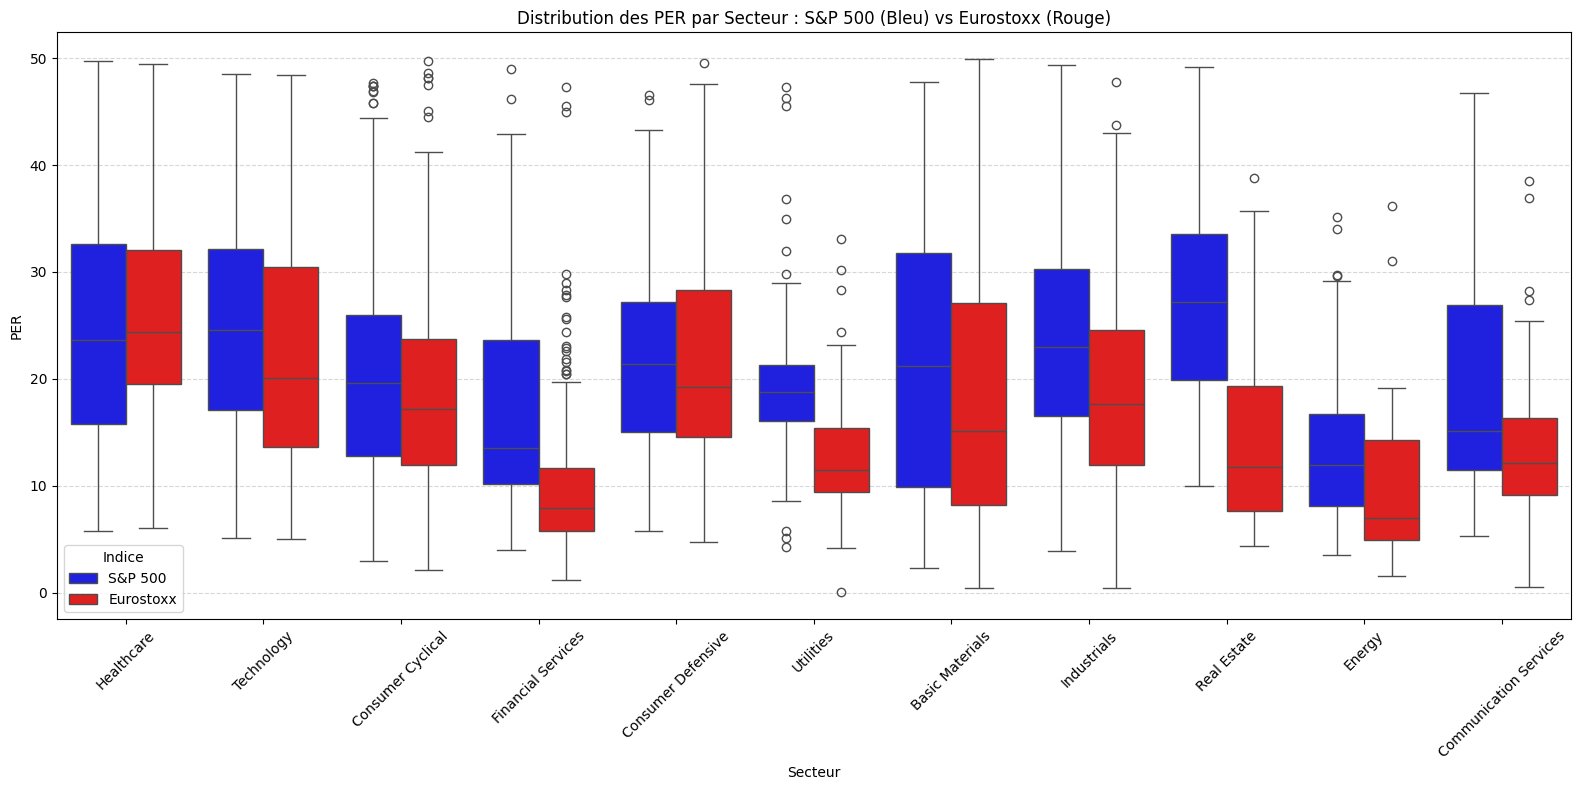

In [24]:
# Faisons un graphique récapitulatif pour mieux visaliser ces différences
# On ajoute une colonne 'Indice' à chacun des data frame pour pouvoir les fusionner tout en gardant la source 
df_SP500['Indice'] = 'S&P 500'
df_STX600['Indice'] = 'Eurostoxx'

# On fusionne tout dans un seul DataFrame
df_combined = pd.concat([df_SP500, df_STX600])

# 4. Créer le graphique
plt.figure(figsize=(16, 8))

# Utilisation d'un boxplot pour comparer les distributions
sns.boxplot(
    data=df_combined,
    x='Sector',
    y='PER_calcule',
    hue='Indice',  # Groupe par indice (S&P vs Eurostoxx)
    palette={'S&P 500': 'blue', 'Eurostoxx': 'red'}  
)

plt.title('Distribution des PER par Secteur : S&P 500 (Bleu) vs Eurostoxx (Rouge)')
plt.xlabel('Secteur')
plt.ylabel('PER')
plt.xticks(rotation=45)  #Lisibilité
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Indice')

plt.tight_layout()
plt.show()

In [18]:
# Comparons la composition des deux index 
repartition_comparee = pd.concat(
    [df_SP500['Sector'].value_counts(), df_STX600['Sector'].value_counts()],
    axis=1,
    keys=['S&P 500', 'Eurostoxx']
)

print("\n=== Tableau Comparatif ===")
display(repartition_comparee)


=== Tableau Comparatif ===


,S&P 500,Eurostoxx
Sector,,
Industrials,250,275
Financial Services,243,241
Technology,189,59
Healthcare,167,109
Consumer Cyclical,161,110
Utilities,111,55
Consumer Defensive,109,95
Real Estate,81,43
Energy,78,42


Ces tables et ce graphique nous permettent d'affirmer qu'il y a deux causes aux différences de valorisation des Index S&P500 et Eurostoxx.
La première est expliquée par la première table et le graphique : au sein d'un même secteur, une entreprise sera plus valorisée aux USA qu'en Europe. 
La seconde est expliquée par la deuxième table : les indices ne sont pas composées de la même façon, il y a beaucoup plus d'entreprises opérant dans des secteurs "traditionnels" eu Europe par rapport aux entreprises opérant dans des secteurs "technologiques" aux États-Unis.

Intéressons nous à ce qui pourrait expliquer cette différence de PER au sein d'un secteur entre les USA et l'Europe. 

In [25]:
# Souvenons nous des variables dont nous disposons. Elles sont les même dans les deux df. 
liste_colonnes = df_SP500.columns.tolist()
print(liste_colonnes)

['Ticker', 'YahooTicker', 'Nom', 'Zone', 'AnneeFiscale', 'DateRapport', 'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN', 'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule', 'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN', 'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN', 'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette', '%Gearing', '%PayOut', "Croissance de l'EPS (en %)", 'Indice']


Regardons d'abord les données "ROE_calcule" et "ROA_calcule". ROE signifie return on equity, c'est le rendement des capitaux propres investis dans l'entreprise. ROA signifie return on assets, c'est le rendement des capitaux propres et des dettes investies dans l'entreprise. Ces variables peuvent être intéressantes car plus une entreprise a un rendement élevé plus on est prêt à payer cher pour l'acquérir. 

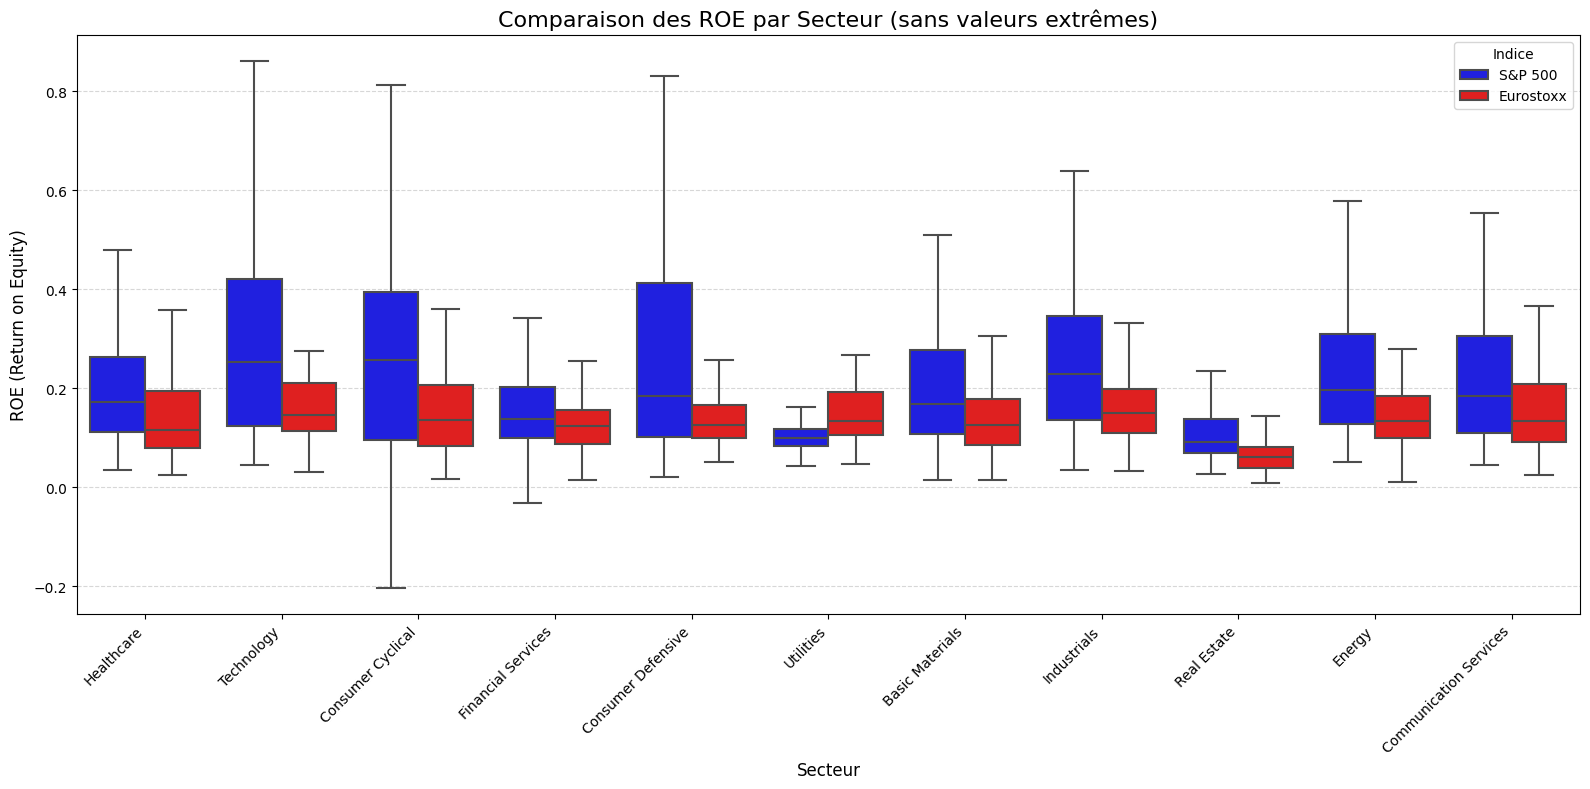

In [26]:
#Regardons les différences de ROE par secteur

# Configuration de la taille
plt.figure(figsize=(16, 8))

# Création du boxplot
sns.boxplot(
    data=df_combined,
    x='Sector',
    y='ROE_calcule',
    hue='Indice',
    palette={'S&P 500': 'blue', 'Eurostoxx': 'red'},
    showfliers=False,  
    linewidth=1.5   
)

# Titres et Labels
plt.title('Comparaison des ROE par Secteur (sans valeurs extrêmes)', fontsize=16)
plt.xlabel('Secteur', fontsize=12)
plt.ylabel('ROE (Return on Equity)', fontsize=12)

# Rotation des étiquettes pour qu'elles ne se chevauchent pas
plt.xticks(rotation=45, ha='right') 

# Grille horizontale pour faciliter la lecture des niveaux
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(title='Indice')
plt.tight_layout()
plt.show()

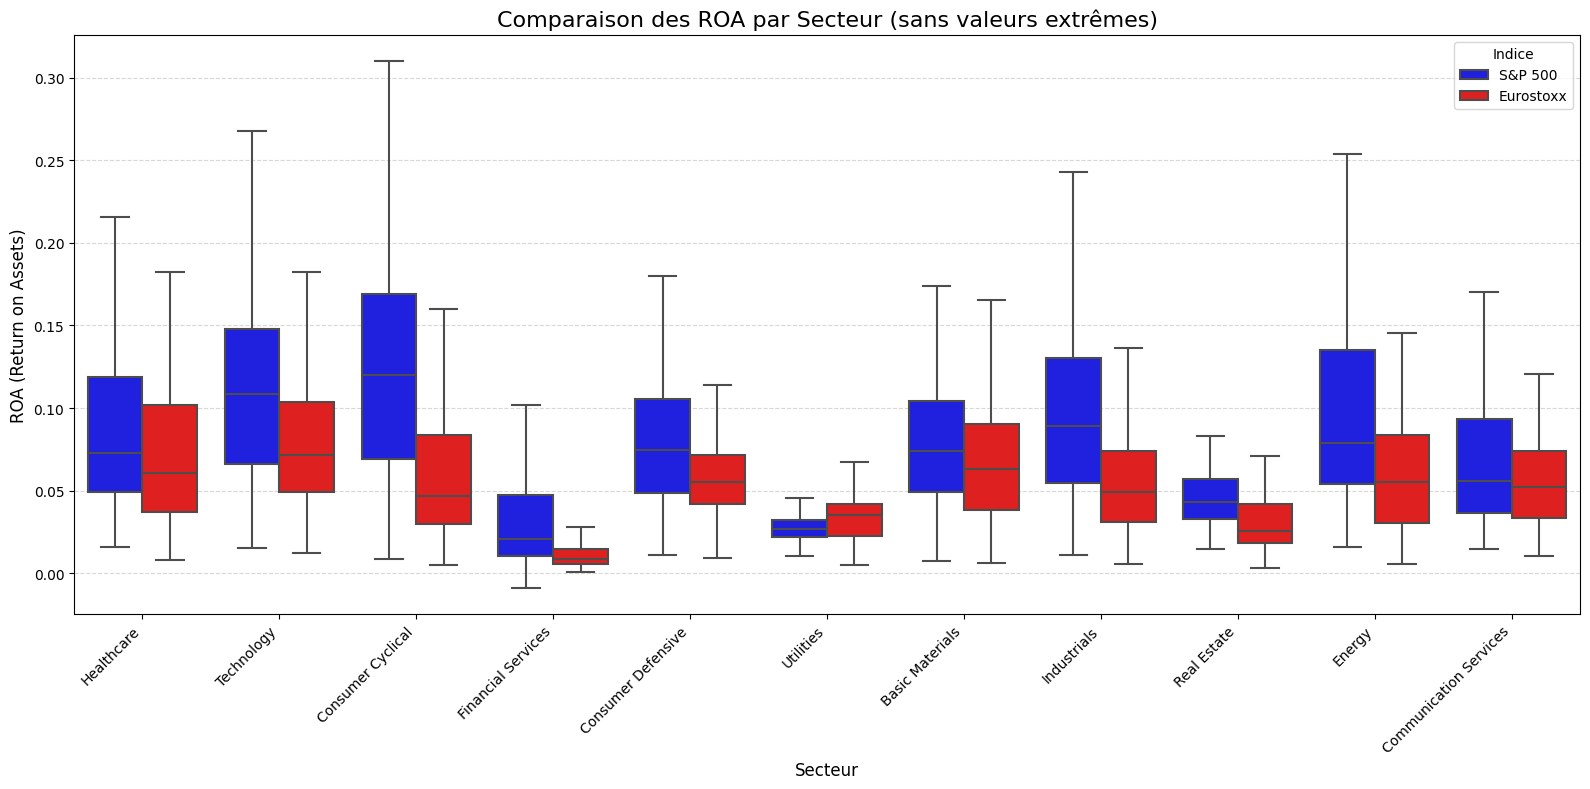

In [21]:
#Regardons les différences de ROA par secteur

# Configuration de la taille
plt.figure(figsize=(16, 8))

# Création du boxplot
sns.boxplot(
    data=df_combined,
    x='Sector',
    y='ROA_calcule',
    hue='Indice',
    palette={'S&P 500': 'blue', 'Eurostoxx': 'red'},
    showfliers=False,  
    linewidth=1.5     
)

# Titres et Labels
plt.title('Comparaison des ROA par Secteur (sans valeurs extrêmes)', fontsize=16)
plt.xlabel('Secteur', fontsize=12)
plt.ylabel('ROA (Return on Assets)', fontsize=12)

# Rotation des étiquettes pour qu'elles ne se chevauchent pas
plt.xticks(rotation=45, ha='right') 

# Grille horizontale pour faciliter la lecture des niveaux
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(title='Indice')
plt.tight_layout()
plt.show()

Il semble donc y avoir des différences importantes de ROA et de ROE entre les USA et l'Europe. Ces deux variables pourraient être significatives pour expliquer les différences de PER. 

Comparons maintenant le pourcentage de marge nette par secteur entre les deux zones géographiques. 

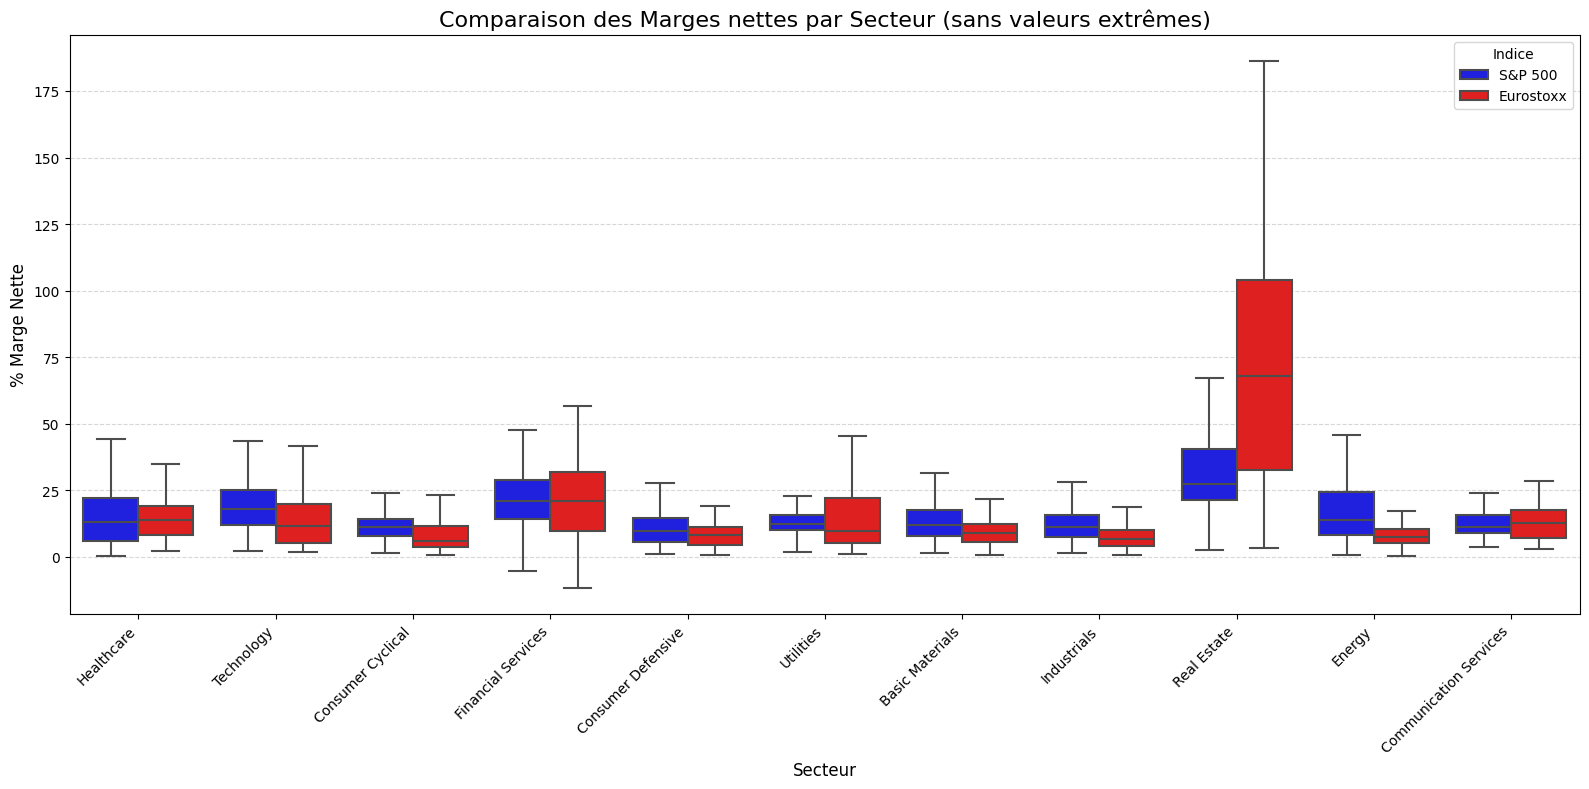

In [22]:
#Regardons les différences de Marge Nette par secteur

# Configuration de la taille
plt.figure(figsize=(16, 8))

# Création du boxplot
sns.boxplot(
    data=df_combined,
    x='Sector',
    y='%MargeNette',
    hue='Indice',
    palette={'S&P 500': 'blue', 'Eurostoxx': 'red'},
    showfliers=False,  
    linewidth=1.5     
)

# Titres et Labels
plt.title('Comparaison des Marges nettes par Secteur (sans valeurs extrêmes)', fontsize=16)
plt.xlabel('Secteur', fontsize=12)
plt.ylabel('% Marge Nette', fontsize=12)

# Rotation des étiquettes pour qu'elles ne se chevauchent pas
plt.xticks(rotation=45, ha='right') 

# Grille horizontale pour faciliter la lecture des niveaux
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.legend(title='Indice')
plt.tight_layout()
plt.show()

In [23]:
table_sp500_margenette = df_SP500.groupby('Sector')['%MargeNette'].describe()
table_eurostoxx_margenette = df_STX600.groupby('Sector')['%MargeNette'].describe()

# Fusionner les deux tableaux côte à côte (axis=1)
df_comparatif_MargeNette = pd.concat(
    [table_sp500_margenette, table_eurostoxx_margenette], 
    axis=1, 
    keys=['S&P 500', 'Eurostoxx']
)

# Filtrer pour n'afficher que certaines colonnes
colonnes_a_garder = ['count', 'mean', '50%', 'std']
# On utilise un "slice" pour afficher à côté les données du SP500 et de l'Eurostoxx
df_comparatif_MargeNette = df_comparatif_MargeNette.loc[:, (slice(None), colonnes_a_garder)]

# 3. Arrondir pour la lisibilité et afficher
display(df_comparatif_MargeNette.round(2))


,S&P 500,Eurostoxx,S&P 500,Eurostoxx,S&P 500,Eurostoxx,S&P 500,Eurostoxx
,count,count,mean,mean,50%,50%,std,std
Sector,,,,,,,,
Basic Materials,65.0,112.0,13.96,10.21,12.15,9.05,9.37,6.79
Communication Services,47.0,65.0,13.48,20.52,11.35,12.84,7.25,37.72
Consumer Cyclical,161.0,110.0,12.78,9.91,11.10,6.16,11.77,13.50
Consumer Defensive,109.0,95.0,11.24,8.46,9.78,8.14,8.39,4.68
Energy,78.0,42.0,18.14,9.49,13.98,7.47,13.94,7.30
Financial Services,243.0,241.0,22.42,26.12,21.11,21.20,11.40,41.66
Healthcare,167.0,109.0,15.38,16.29,13.25,13.90,12.02,13.92
Industrials,250.0,275.0,12.87,8.45,11.44,6.73,8.24,7.93
